# **Reto Actinver**

###1. Instalación de Librerías

En esta sección, se instalan las librerías necesarias para el análisis de datos financieros y la optimización de portafolios.

In [1]:
# Instalar libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cvxopt as opt
from cvxopt import matrix, blas, solvers

# Configurar el estilo de los gráficos
plt.style.use('seaborn-darkgrid')
sns.set_palette("muted")
sns.set_context("notebook")

# Función para establecer el estilo de gráficos
def set_plot_style():
    plt.rcParams['figure.figsize'] = (14, 8)
    plt.rcParams['font.size'] = 14
    plt.rcParams['axes.titlesize'] = 18
    plt.rcParams['axes.labelsize'] = 14
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    plt.rcParams['axes.titleweight'] = 'bold'
    plt.rcParams['axes.labelweight'] = 'bold'
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.4
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.framealpha'] = 0.8
    plt.rcParams['legend.fancybox'] = True
    plt.rcParams['legend.loc'] = 'best'

# Llamar a la función para establecer el estilo de gráficos
set_plot_style()


<ipython-input-1-524b7d367783>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


###2. Descarga de Datos Históricos

En esta sección, se descargan los datos históricos de precios ajustados para los activos que se encuentran en la plataforma de Actinverv (solo acciones y FIBRAS) utilizando la librería yfinance. Se especifican los tickers de los activos y el rango de fechas para la descarga de los datos.

In [2]:
import yfinance as yf

# Lista de tickers
tickers = [
    'FINDEP.MX', 'GNP.MX', 'UNIFINA.MX', 'AC.MX', 'ACTINVRB.MX', 'AEROMEX.MX',
    'AGUA.MX', 'ALEATIC.MX', 'ALFAA.MX', 'ALPEKA.MX', 'ALSEA.MX', 'ALTERNAB.MX',
    'AMX', 'ARA.MX', 'ASURB.MX', 'AUTLANB.MX', 'AXTELCPO.MX', 'AZTECACPO.MX',
    'BAFARB.MX', 'BIMBOA.MX', 'BOLSAA.MX', 'CEMEXCPO.MX','CERAMICB.MX',
    'CHDRAUIB.MX', 'CIDMEGA.MX', 'CIEB.MX', 'CMOCTEZ.MX', 'CMRB.MX',
    'CONVERA.MX', 'COXA.MX','CUERVO.MX', 'CULTIBAB.MX', 'CYDSASAA.MX',
    'DINEA.MX', 'DINEB.MX', 'ELEKTRA.MX', 'FEMSAUB.MX', 'FEMSAUBD.MX',
    'FRAGUAB.MX', 'GAPB.MX', 'GBMO.MX', 'GCARSOA1.MX', 'GCC.MX', 'GENTERA.MX',
    'GFAMSAA.MX', 'GFINBURO.MX','GFNORTEO.MX', 'GICSAB.MX', 'GIGANTE.MX',
    'GISSAA.MX', 'GMD.MX', 'GMEXICOB.MX', 'GMXT.MX', 'GPROFUT.MX', 'GRUMAB.MX',
    'HCITY.MX', 'HERDEZ.MX', 'HOMEX.MX', 'HOTEL.MX', 'ICHB.MX', 'IDEALB-1.MX',
    'INVEXA.MX', 'KIMBERA.MX', 'KOFUBL.MX', 'KUOA.MX', 'KUOB.MX', 'LABB.MX',
    'LACOMERUBC.MX', 'LAMOSA.MX','LIVEPOL1.MX', 'LIVEPOLC-1.MX', 'MEDICAB.MX',
    'MEGACPO.MX', 'MFRISCOA-1.MX', 'NEMAKA.MX', 'OMAB.MX', 'ORBIA.MX',
    'PASAB.MX', 'PE&OLES.MX', 'PINFRA.MX', 'PINFRAL.MX', 'POCHTECB.MX',
    'POSADASA.MX', 'Q.MX', 'RA.MX', 'RCENTROA.MX', 'RLHA.MX', 'SIMECB.MX',
    'SITES1A-1.MX', 'SORIANAB.MX', 'SPORTS.MX', 'TEAKCPO.MX', 'TLEVISACPO.MX',
    'TMMA.MX', 'TRAXIONA.MX', 'URBI.MX', 'VALUEGFO.MX', 'VASCONI.MX',
    'VESTA.MX', 'VINTE.MX', 'VISTAA.MX','VOLARA.MX', 'WALMEX.MX', 'AA1.MX',
    'AAL', 'AAPL', 'ADBE', 'AMAT', 'AMC', 'AMD', 'AMZN', 'APA', 'BA', 'BABA',
    'BAC', 'BILI', 'BLK', 'BNTX', 'BRK-B', 'BX', 'C', 'CAT', 'CCL', 'CLF',
    'CNK', 'COP', 'COST', 'CRM', 'CRWD', 'CTRA', 'CVX', 'DAL', 'DIS', 'DVN',
    'ET', 'F', 'FANG', 'FCX', 'FDX', 'GE', 'GM', 'GOOG', 'GOOGL', 'GPS', 'GS',
    'HD', 'JPM', 'JWN', 'KO', 'LCID', 'LULU', 'LVS', 'LYFT', 'M', 'MA', 'MARA',
    'MCD', 'MELI', 'META', 'MP', 'MRK', 'MRNA', 'MRO', 'MS', 'MSFT', 'MU',
    'NCLH', 'NFLX', 'NIO', 'NKE', 'NUE', 'NVDA', 'OVV', 'OXY', 'PDD', 'PFE',
    'PSX', 'PTON', 'PYPL', 'QCOM', 'ROKU', 'SHOP', 'SPCE', 'SQ', 'T', 'TSLA',
    'TSM', 'TX', 'UAL', 'UBER', 'UNH', 'V', 'VALE', 'VLO', 'WFC', 'WMT', 'WYNN',
    'X', 'XOM', 'XPEV','BBVA', 'FRES', 'SRE', 'BBAJIOO.MX', 'DANHOS13.MX',
    'EDUCA18.MX','FIBRAHD15.MX', 'FIBRAMQ12.MX', 'FIBRAPL14.MX', 'FIBRAUP18.MX',
    'FIHO12.MX', 'FINN13.MX', 'FMTY14.MX', 'FNOVA17.MX', 'FPLUS16.MX',
    'FSHOP13.MX', 'FSITES20.MX', 'FUNO11.MX', 'SOMA21.MX', 'STORAGE18.MX',
    'TERRA13.MX', 'FCFE18.MX', 'FEXI21.MX', 'FORION20.MX', 'FVIA16.MX',
]

# Descargar datos históricos (últimos 5 años)
data = yf.download(tickers, start="2019-04-01", end="2024-04-01")['Close']

# Mostrar las primeras filas del DataFrame
print(data.head())

[*********************100%%**********************]  225 of 225 completed


Ticker      AA1.MX        AAL       AAPL       AC.MX  ACTINVRB.MX        ADBE  \
Date                                                                            
2019-04-01   567.0  32.349998  47.810001  107.120003         12.9  272.170013   
2019-04-02   555.0  32.990002  48.505001  106.930000         12.8  271.350006   
2019-04-03   555.0  33.709999  48.837502  106.910004         12.8  271.500000   
2019-04-04   555.0  33.930000  48.922501  106.589996         12.8  267.890015   
2019-04-05   555.0  34.060001  49.250000  107.349998         12.8  267.450012   

Ticker      AEROMEX.MX    AGUA.MX  ALEATIC.MX   ALFAA.MX  ...   VISTAA.MX  \
Date                                                      ...               
2019-04-01   20.590000  20.280001   20.629999  18.801268  ...  177.979996   
2019-04-02   20.230000  20.510000   20.629999  18.801268  ...  177.979996   
2019-04-03   20.190001  19.730000   20.629999  18.938303  ...  177.000000   
2019-04-04   20.290001  20.379999   20.629999  

###3. Selección de Activos con Sharpe Mayor a 1

Se calculan los rendimientos diarios y anuales de los activos. Luego, se calculan los ratios de Sharpe para cada activo y se seleccionan aquellos con un ratio de Sharpe mayor a 1.


In [3]:
# Calcular el rendimiento diario y la desviación estándar
daily_returns = data.pct_change().dropna()

# Calcular el rendimiento anual esperado y la desviación estándar anual
expected_annual_returns = daily_returns.mean() * 252
annual_std_dev = daily_returns.std() * np.sqrt(252)

# Calcular el Sharpe ratio de cada ticker
sharpe_ratios = expected_annual_returns / annual_std_dev

# Filtrar los tickers que tienen un Sharpe ratio mayor o igual a 1
filtered_tickers = sharpe_ratios[sharpe_ratios >= 1].index.tolist()

# Mostrar los tickers filtrados
print("Tickers con Sharpe ratio >= 1:")
print(filtered_tickers)

Tickers con Sharpe ratio >= 1:
['AA1.MX', 'AAL', 'ALSEA.MX', 'AMAT', 'AMD', 'AMZN', 'APA', 'ASURB.MX', 'AXTELCPO.MX', 'BAC', 'BBAJIOO.MX', 'BBVA', 'BILI', 'BLK', 'BOLSAA.MX', 'BRK-B', 'BX', 'C', 'CAT', 'CEMEXCPO.MX', 'CHDRAUIB.MX', 'CIEB.MX', 'CLF', 'CNK', 'CONVERA.MX', 'COP', 'COST', 'CRM', 'CRWD', 'CTRA', 'CUERVO.MX', 'CVX', 'CYDSASAA.MX', 'DAL', 'DINEA.MX', 'DINEB.MX', 'DIS', 'DVN', 'EDUCA18.MX', 'ET', 'F', 'FANG', 'FCX', 'FDX', 'FEXI21.MX', 'FIBRAHD15.MX', 'FINDEP.MX', 'FINN13.MX', 'FPLUS16.MX', 'FRAGUAB.MX', 'FRES', 'GCC.MX', 'GE', 'GENTERA.MX', 'GFINBURO.MX', 'GFNORTEO.MX', 'GIGANTE.MX', 'GM', 'GMEXICOB.MX', 'GOOG', 'GOOGL', 'GPS', 'GS', 'HD', 'IDEALB-1.MX', 'JPM', 'JWN', 'KUOA.MX', 'LABB.MX', 'LIVEPOL1.MX', 'LIVEPOLC-1.MX', 'LVS', 'LYFT', 'M', 'MA', 'MARA', 'MEGACPO.MX', 'META', 'MFRISCOA-1.MX', 'MRK', 'MRO', 'MS', 'MSFT', 'MU', 'NCLH', 'NFLX', 'NUE', 'NVDA', 'OMAB.MX', 'OVV', 'OXY', 'PASAB.MX', 'PE&OLES.MX', 'PINFRA.MX', 'POSADASA.MX', 'PSX', 'PYPL', 'Q.MX', 'QCOM', 'RA.MX', 'R

###4. Selección de Activos Menos Correlacionados con Matriz de Correlaciones

En esta sección, se calcula la matriz de correlaciones entre los activos seleccionados. Se seleccionan los activos con correlaciones máximas menores a 0.7 para reducir el riesgo sistémico.

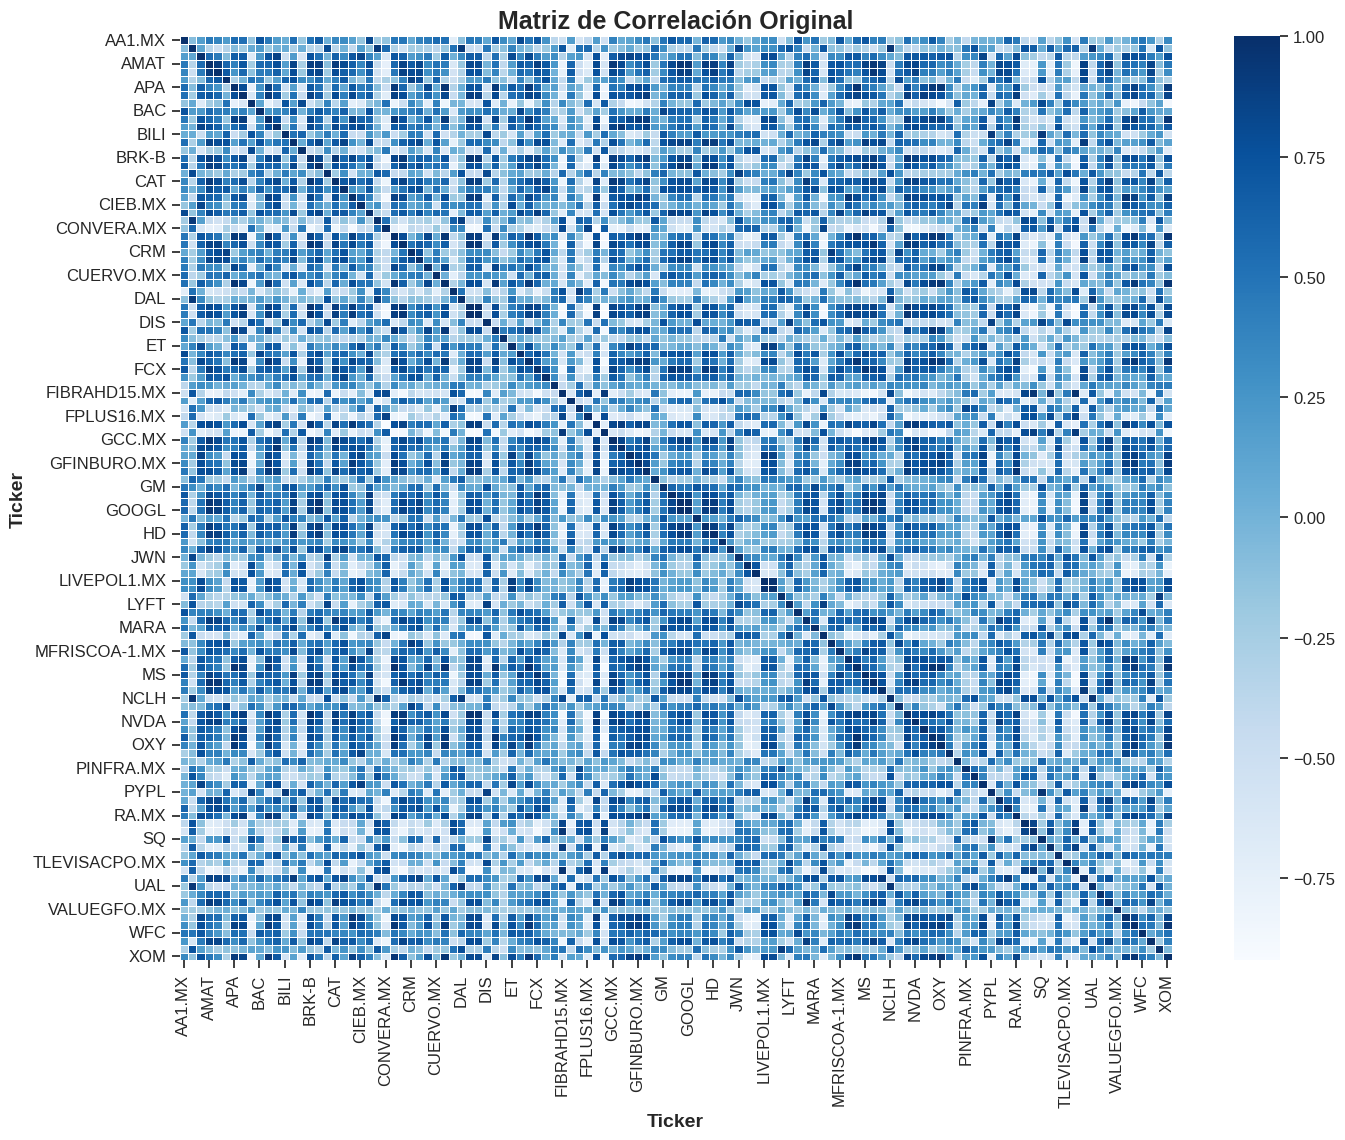

Tickers con baja correlación:
['AA1.MX', 'AAL', 'ALSEA.MX', 'AMAT', 'AMZN', 'APA', 'AXTELCPO.MX', 'CONVERA.MX', 'CUERVO.MX', 'CYDSASAA.MX', 'EDUCA18.MX', 'FEXI21.MX', 'FINDEP.MX', 'FRES', 'GIGANTE.MX', 'GM', 'LVS', 'PE&OLES.MX', 'TERRA13.MX', 'TLEVISACPO.MX', 'UBER', 'VALUEGFO.MX']


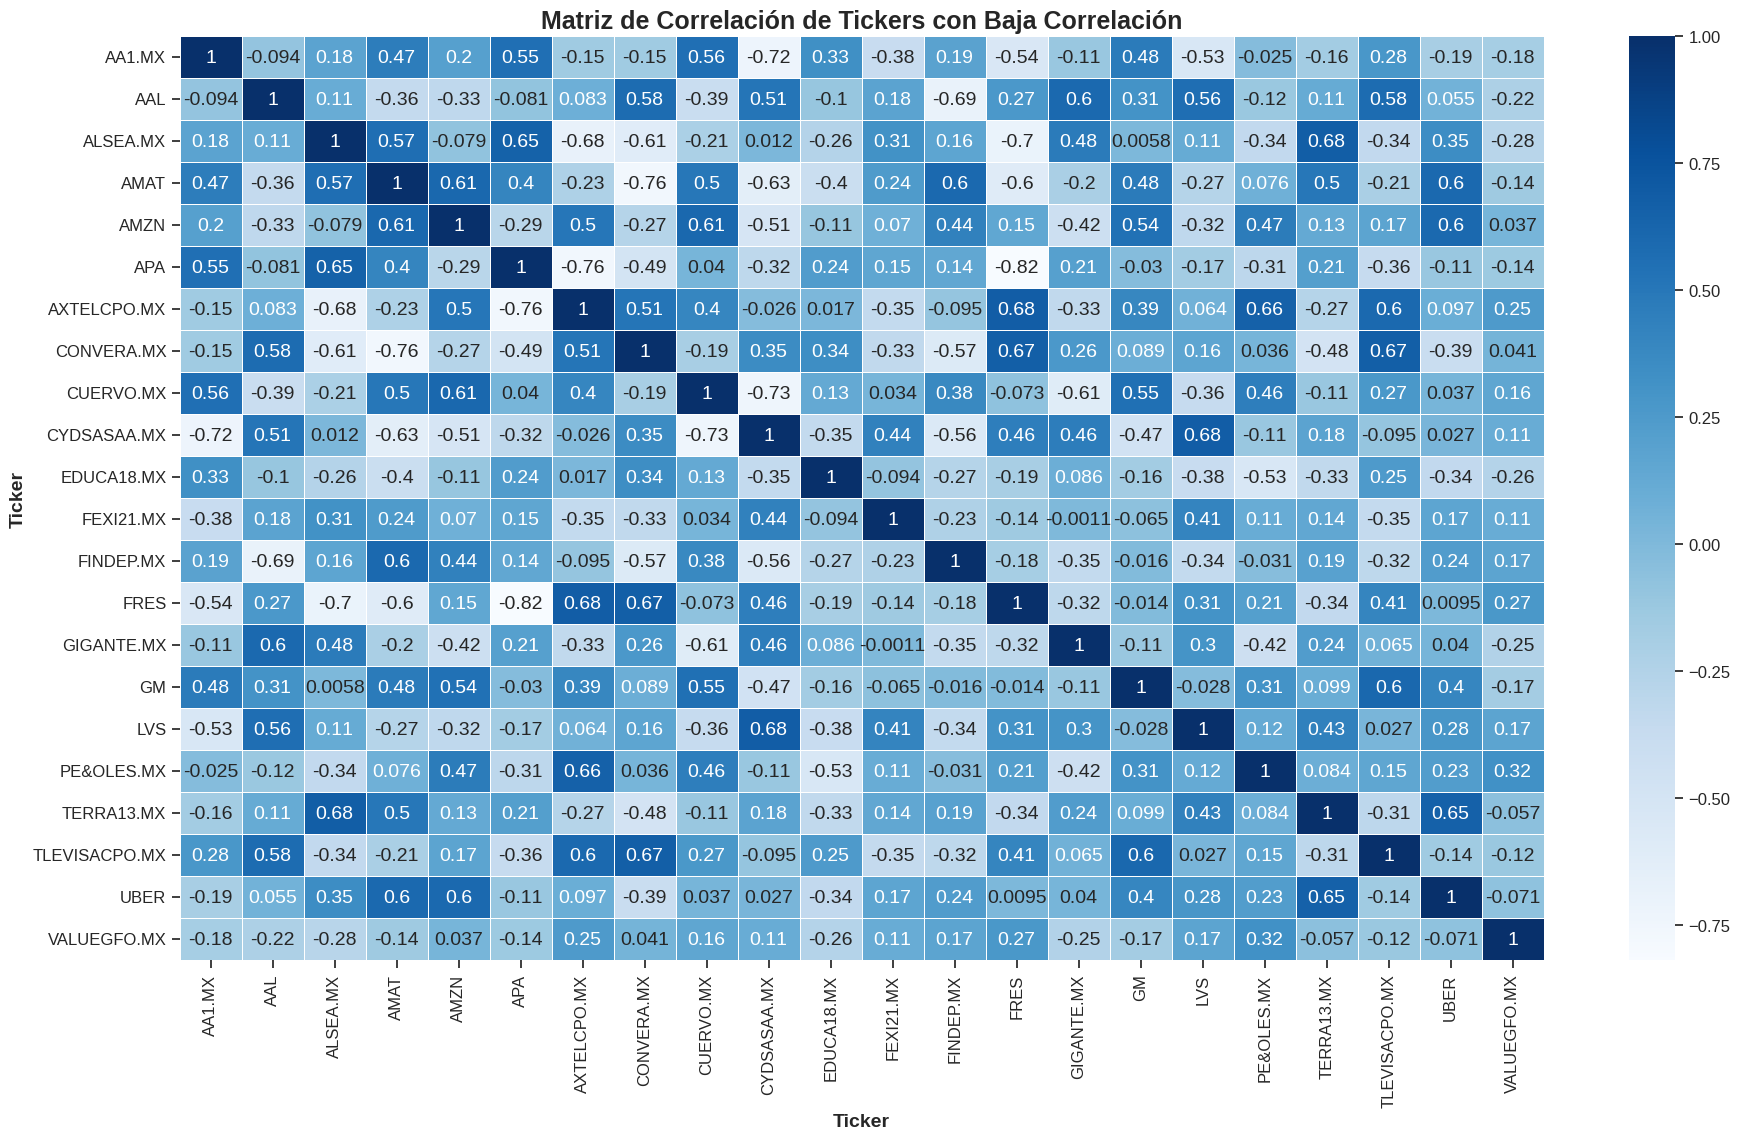

Nueva Matriz de Correlación:
Ticker           AA1.MX       AAL  ALSEA.MX      AMAT      AMZN       APA  \
Ticker                                                                      
AA1.MX         1.000000 -0.093740  0.180689  0.465621  0.204535  0.553795   
AAL           -0.093740  1.000000  0.108995 -0.357407 -0.328371 -0.081181   
ALSEA.MX       0.180689  0.108995  1.000000  0.565657 -0.079355  0.650654   
AMAT           0.465621 -0.357407  0.565657  1.000000  0.607012  0.403683   
AMZN           0.204535 -0.328371 -0.079355  0.607012  1.000000 -0.290015   
APA            0.553795 -0.081181  0.650654  0.403683 -0.290015  1.000000   
AXTELCPO.MX   -0.150756  0.082815 -0.680078 -0.229775  0.504904 -0.757005   
CONVERA.MX    -0.149867  0.579456 -0.608459 -0.761050 -0.270081 -0.489365   
CUERVO.MX      0.555779 -0.386435 -0.214928  0.499704  0.608446  0.039930   
CYDSASAA.MX   -0.724142  0.512615  0.012102 -0.634471 -0.511863 -0.315346   
EDUCA18.MX     0.328688 -0.104408 -0.261421 -0.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear la matriz de correlación original
filtered_data = data[filtered_tickers]
correlation_matrix = filtered_data.corr()

# Graficar la matriz de correlación original
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', linewidths=0.5)
plt.title('Matriz de Correlación Original')
plt.show()

# Función para seleccionar acciones con correlación máxima menor a 0.7
def select_lowly_correlated_assets(corr_matrix, threshold=0.7):
    selected_tickers = []
    for ticker in corr_matrix.columns:
        if all(corr_matrix[ticker][selected_tickers] < threshold):
            selected_tickers.append(ticker)
    return selected_tickers

# Seleccionar acciones con correlación máxima menor a 0.7
low_correlation_tickers = select_lowly_correlated_assets(correlation_matrix,
                                                         threshold=0.7)

# Imprimir los tickers con baja correlación
print("Tickers con baja correlación:")
print(low_correlation_tickers)

# Crear una nueva matriz de correlación con las acciones de baja correlación
low_correlation_data = data[low_correlation_tickers]
new_correlation_matrix = low_correlation_data.corr()

# Graficar la nueva matriz de correlación
plt.figure(figsize=(22, 12))
sns.heatmap(new_correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Matriz de Correlación de Tickers con Baja Correlación')
plt.show()

# Imprimir la nueva matriz de correlación para ver los valores numéricos
print("Nueva Matriz de Correlación:")
print(new_correlation_matrix)

###5. Creación de Portafolios Óptimos

Se definen funciones para calcular el rendimiento y la volatilidad del portafolio, así como el ratio de Sharpe con restricciones. Luego, se optimiza el portafolio para maximizar el ratio de Sharpe y tambien encontrar los portafolios con la menor volatildiad asi comom el mayor rendimiento.

<ipython-input-5-53c3df70e19d>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-5-53c3df70e19d>:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20c')


Composición del Portafolio de Mayor Sharpe Ratio:
         Ticker    Weight
2      ALSEA.MX  0.100000
3          AMAT  0.077560
5           APA  0.081056
9   CYDSASAA.MX  0.100000
12    FINDEP.MX  0.100000
14   GIGANTE.MX  0.100000
16          LVS  0.100000
17   PE&OLES.MX  0.055218
18   TERRA13.MX  0.100000
20         UBER  0.100000
21  VALUEGFO.MX  0.080266

Composición del Portafolio de Menor Volatilidad:
         Ticker    Weight
0        AA1.MX  0.017002
2      ALSEA.MX  0.077706
5           APA  0.013604
6   AXTELCPO.MX  0.011713
7    CONVERA.MX  0.100000
8     CUERVO.MX  0.100000
9   CYDSASAA.MX  0.100000
10   EDUCA18.MX  0.100000
11    FEXI21.MX  0.100000
12    FINDEP.MX  0.100000
14   GIGANTE.MX  0.100000
16          LVS  0.021685
17   PE&OLES.MX  0.025626
18   TERRA13.MX  0.100000
21  VALUEGFO.MX  0.024780

Composición del Portafolio de Mayor Rendimiento:
         Ticker  Weight
2      ALSEA.MX     0.1
3          AMAT     0.1
5           APA     0.1
9   CYDSASAA.MX     0.1
12

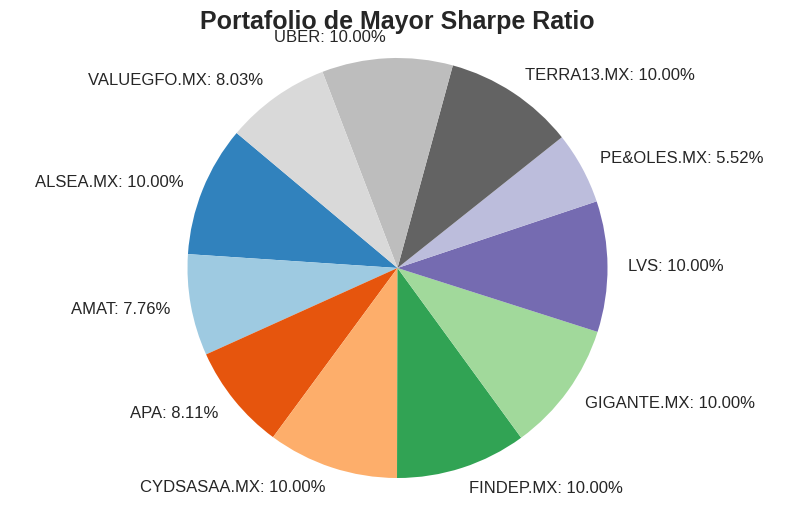

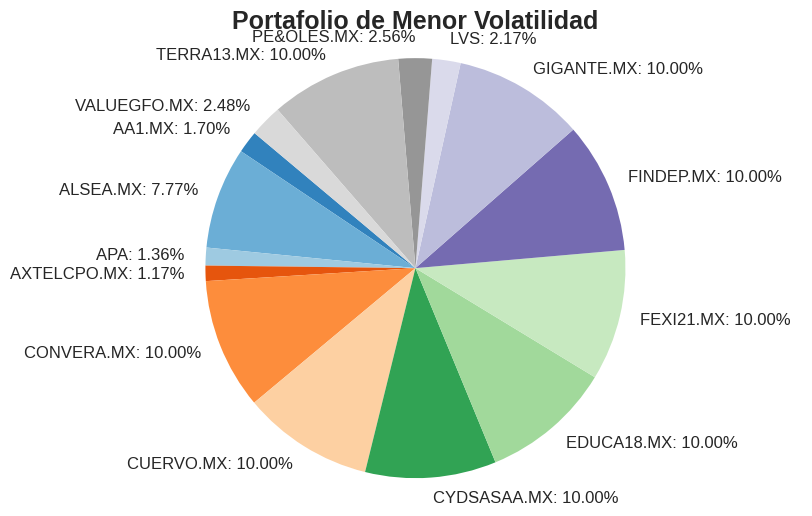

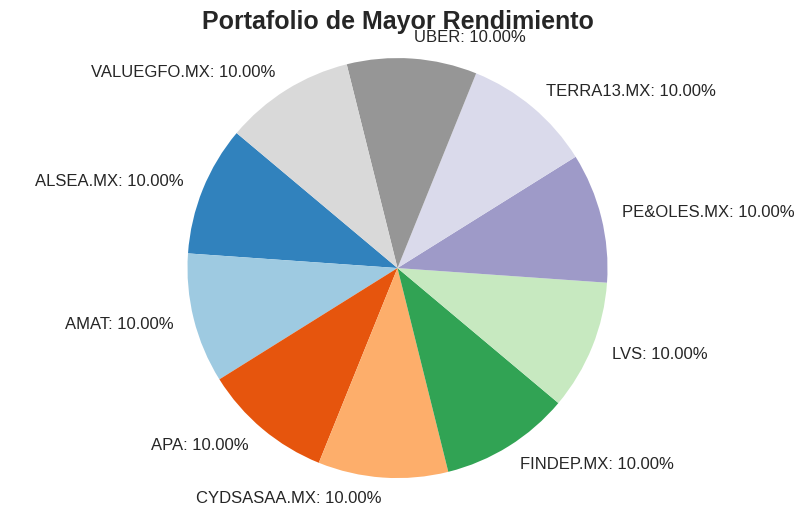

Portafolio de Mayor Sharpe Ratio - Rendimiento Anual Esperado: 20.09%, Volatilidad Anual: 15.73%, Sharpe Ratio: 0.64
Portafolio de Menor Volatilidad - Rendimiento Anual Esperado: 7.03%, Volatilidad Anual: 7.92%, Sharpe Ratio: -0.38
Portafolio de Mayor Rendimiento - Rendimiento Anual Esperado: 21.06%, Volatilidad Anual: 17.88%, Sharpe Ratio: 0.61

Composición del Portafolio de Mayor Sharpe Ratio por Industria:
Industry
Chemicals                              0.100000
Credit Services                        0.100000
REIT - Industrial                      0.100000
Resorts & Casinos                      0.100000
Restaurants                            0.100000
Software - Application                 0.100000
Specialty Retail                       0.100000
Oil & Gas E&P                          0.081056
Capital Markets                        0.080266
Semiconductor Equipment & Materials    0.077560
Other Industrial Metals & Mining       0.055218
Name: Weight, dtype: float64

Composición del Port

<ipython-input-5-53c3df70e19d>:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_sharpe_df_filtered['Industry'] = industry
<ipython-input-5-53c3df70e19d>:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio_sharpe_df_filtered['Sector'] = sector
<ipython-input-5-53c3df70e19d>:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [5]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import cm

# Configuración del gráfico
plt.style.use('seaborn-darkgrid')

# Datos filtrados con tickers de baja correlación
low_correlation_data = data[low_correlation_tickers]

# Calcular rendimientos diarios y anuales
daily_returns = low_correlation_data.pct_change().dropna()
annual_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Calcular VaR (Value at Risk)
def calculate_var(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    return sorted_returns[index]

daily_var = daily_returns.apply(calculate_var, axis=0)
annual_var = daily_var * np.sqrt(252)  # Asumimos que la varianza escala con la raíz cuadrada del tiempo
max_var_threshold = -0.025

# Calcular métricas del portafolio
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Función objetivo: maximizar el Sharpe Ratio con restricciones
def sharpe_ratio_with_constraints(weights, returns, cov_matrix, risk_free_rate=0.080788 + 0.02):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    portfolio_var = np.dot(weights, annual_var)
    if portfolio_var > max_var_threshold:
        return 1e10  # Penalizar si el VaR del portafolio excede el límite
    return -sharpe_ratio

# Restricción de igualdad: la suma de los pesos debe ser 1
def constraint_eq(weights):
    return np.sum(weights) - 1.0

# Restricción de porcentaje máximo por activo (10%)
def constraint_max_weight(weights):
    return 0.1 - np.max(weights)

# Resolver el problema de optimización con restricciones adicionales
def optimize_portfolio_with_constraints(objective, returns, cov_matrix):
    n_assets = len(returns)
    initial_guess = np.ones(n_assets) / n_assets  # Inicialización igualmente ponderada
    bounds = [(0.0, 0.1)] * n_assets  # Pesos entre 0 y 10%
    constraints = [
        {'type': 'eq', 'fun': constraint_eq},
        {'type': 'ineq', 'fun': constraint_max_weight}
    ]
    solution = minimize(objective, initial_guess, args=(returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    return solution.x

# Optimizar para Sharpe ratio con restricciones
weights_sharpe = optimize_portfolio_with_constraints(sharpe_ratio_with_constraints, annual_returns, cov_matrix)

# Calcular métricas financieras
def calculate_metrics(weights, returns, cov_matrix, risk_free_rate=0.080788 + 0.02):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe_ratio_value = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio_value

metrics_sharpe = calculate_metrics(weights_sharpe, annual_returns, cov_matrix)

# Optimizar para menor volatilidad con restricciones
def min_volatility_with_constraints(weights, returns, cov_matrix):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

weights_min_vol = optimize_portfolio_with_constraints(min_volatility_with_constraints, annual_returns, cov_matrix)
metrics_min_vol = calculate_metrics(weights_min_vol, annual_returns, cov_matrix)

# Optimizar para mayor rendimiento con restricciones
def max_return_with_constraints(weights, returns, cov_matrix):
    portfolio_return = np.sum(weights * returns)
    return -portfolio_return

weights_max_return = optimize_portfolio_with_constraints(max_return_with_constraints, annual_returns, cov_matrix)
metrics_max_return = calculate_metrics(weights_max_return, annual_returns, cov_matrix)

# Crear DataFrames para mostrar las composiciones del portafolio
portfolio_sharpe_df = pd.DataFrame({'Ticker': low_correlation_tickers, 'Weight': weights_sharpe})
portfolio_min_vol_df = pd.DataFrame({'Ticker': low_correlation_tickers, 'Weight': weights_min_vol})
portfolio_max_return_df = pd.DataFrame({'Ticker': low_correlation_tickers, 'Weight': weights_max_return})

# Filtrar acciones con más del 1% de la composición
def filter_top_assets(df, threshold=0.01):
    return df[df['Weight'] > threshold]

portfolio_sharpe_df_filtered = filter_top_assets(portfolio_sharpe_df)
portfolio_min_vol_df_filtered = filter_top_assets(portfolio_min_vol_df)
portfolio_max_return_df_filtered = filter_top_assets(portfolio_max_return_df)

# Imprimir tablas de composiciones del portafolio
print("Composición del Portafolio de Mayor Sharpe Ratio:")
print(portfolio_sharpe_df_filtered)

print("\nComposición del Portafolio de Menor Volatilidad:")
print(portfolio_min_vol_df_filtered)

print("\nComposición del Portafolio de Mayor Rendimiento:")
print(portfolio_max_return_df_filtered)

# Graficar la composición del portafolio usando gráficos de torta
def plot_portfolio_composition(df, title):
    plt.figure(figsize=(10, 6))
    cmap = cm.get_cmap('tab20c')
    colors = [cmap(i) for i in np.linspace(0, 1, len(df))]
    plt.pie(df['Weight'], labels=[f"{label}: {weight:.2%}" for label, weight in zip(df['Ticker'], df['Weight'])], colors=colors, startangle=140)
    plt.title(title)
    plt.axis('equal')
    plt.show()

plot_portfolio_composition(portfolio_sharpe_df_filtered, 'Portafolio de Mayor Sharpe Ratio')
plot_portfolio_composition(portfolio_min_vol_df_filtered, 'Portafolio de Menor Volatilidad')
plot_portfolio_composition(portfolio_max_return_df_filtered, 'Portafolio de Mayor Rendimiento')

# Imprimir métricas financieras
def print_metrics(name, metrics):
    print(f"{name} - Rendimiento Anual Esperado: {metrics[0]:.2%}, Volatilidad Anual: {metrics[1]:.2%}, Sharpe Ratio: {metrics[2]:.2f}")

print_metrics('Portafolio de Mayor Sharpe Ratio', metrics_sharpe)
print_metrics('Portafolio de Menor Volatilidad', metrics_min_vol)
print_metrics('Portafolio de Mayor Rendimiento', metrics_max_return)

# Obtener datos adicionales para el portafolio de mayor Sharpe (industria, sector, país)
tickers_info = yf.Tickers(low_correlation_tickers).tickers
industry = []
sector = []
country = []

for ticker in portfolio_sharpe_df_filtered['Ticker']:
    info = tickers_info[ticker].info
    industry.append(info.get('industry', 'N/A'))
    sector.append(info.get('sector', 'N/A'))
    country.append(info.get('country', 'N/A'))

portfolio_sharpe_df_filtered['Industry'] = industry
portfolio_sharpe_df_filtered['Sector'] = sector
portfolio_sharpe_df_filtered['Country'] = country

# Mostrar la composición por industria, sector y país
print("\nComposición del Portafolio de Mayor Sharpe Ratio por Industria:")
print(portfolio_sharpe_df_filtered.groupby('Industry')['Weight'].sum().sort_values(ascending=False))

print("\nComposición del Portafolio de Mayor Sharpe Ratio por Sector:")
print(portfolio_sharpe_df_filtered.groupby('Sector')['Weight'].sum().sort_values(ascending=False))

print("\nComposición del Portafolio de Mayor Sharpe Ratio por País:")
print(portfolio_sharpe_df_filtered.groupby('Country')['Weight'].sum().sort_values(ascending=False))

###6. Análisis VaR del Portafolio Óptimo

En esta sección, se calcula el Valor en Riesgo (VaR) diario y anual para el portafolio optimo. El VaR estima la pérdida máxima que un portafolio puede experimentar con un nivel de confianza dado.

In [20]:
import numpy as np
from scipy.stats import norm

# Supongamos un monto del portafolio de 1,000,000 de pesos
portfolio_value = 400_000

# Parámetros del VaR
confidence_level = 0.95
max_var_threshold = -0.025  # 2.5% máximo de pérdida permitida

# Función para calcular el VaR histórico
def historical_var(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    return sorted_returns[index]

# Función para calcular el VaR paramétrico
def parametric_var(portfolio_return, portfolio_volatility, confidence_level=0.95):
    z_score = norm.ppf(1 - confidence_level)
    return portfolio_return + z_score * portfolio_volatility

# Función para calcular el VaR mediante simulación de Monte Carlo
def monte_carlo_var(returns, num_simulations=10000, confidence_level=0.95):
    mean_return = np.mean(returns)
    std_return = np.std(returns)
    simulated_returns = np.random.normal(mean_return, std_return, num_simulations)
    return np.percentile(simulated_returns, (1 - confidence_level) * 100)

# Calcular rendimientos diarios del portafolio
portfolio_daily_returns = daily_returns.dot(weights_sharpe)

# Calcular VaR histórico
historical_var_value = historical_var(portfolio_daily_returns, confidence_level=0.95)
historical_var_amount = historical_var_value * portfolio_value
historical_var_percent = historical_var_amount / portfolio_value * 100

# Calcular VaR paramétrico
parametric_var_value = parametric_var(portfolio_daily_returns.mean(), portfolio_daily_returns.std(), confidence_level=0.95)
parametric_var_amount = parametric_var_value * portfolio_value
parametric_var_percent = parametric_var_amount / portfolio_value * 100

# Calcular VaR mediante simulación de Monte Carlo
monte_carlo_var_value = monte_carlo_var(portfolio_daily_returns, num_simulations=10000, confidence_level=0.95)
monte_carlo_var_amount = monte_carlo_var_value * portfolio_value
monte_carlo_var_percent = monte_carlo_var_amount / portfolio_value * 100

# Imprimir los resultados
print(f"VaR Histórico (Monto): {historical_var_amount:.2f} MXN, (Porcentaje): {historical_var_percent:.2f}%")
print(f"VaR Paramétrico (Monto): {parametric_var_amount:.2f} MXN, (Porcentaje): {parametric_var_percent:.2f}%")
print(f"VaR Monte Carlo (Monto): {monte_carlo_var_amount:.2f} MXN, (Porcentaje): {monte_carlo_var_percent:.2f}%")

# Verificar si el VaR cumple con la restricción
max_var_amount = max_var_threshold * portfolio_value

print(f"\nMáximo VaR permitido (Monto): {max_var_amount:.2f} MXN, (Porcentaje): {max_var_threshold * 100:.2f}%")
print(f"\nCumplimiento de la restricción:")
print(f"Histórico: {'Sí' if historical_var_amount >= max_var_amount else 'No'}")
print(f"Paramétrico: {'Sí' if parametric_var_amount >= max_var_amount else 'No'}")
print(f"Monte Carlo: {'Sí' if monte_carlo_var_amount >= max_var_amount else 'No'}")

VaR Histórico (Monto): -6175.11 MXN, (Porcentaje): -1.54%
VaR Paramétrico (Monto): -6268.95 MXN, (Porcentaje): -1.57%
VaR Monte Carlo (Monto): -6100.89 MXN, (Porcentaje): -1.53%

Máximo VaR permitido (Monto): -10000.00 MXN, (Porcentaje): -2.50%

Cumplimiento de la restricción:
Histórico: Sí
Paramétrico: Sí
Monte Carlo: Sí


###7. Creación de Frontera Eficiente

Se generan portafolios aleatorios y se crea una gráfica de la frontera eficiente, que muestra la relación entre el riesgo y el rendimiento esperado de diferentes combinaciones de activos.

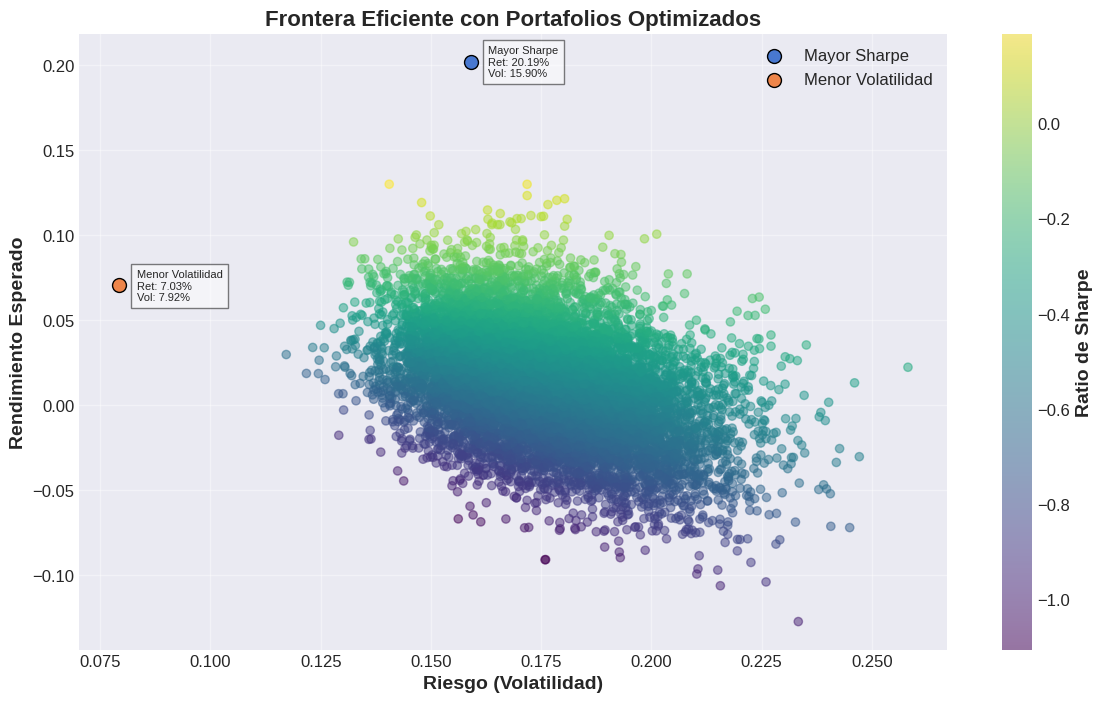


Mayor Sharpe Portafolio:
     Ticker   Weight
       UBER 0.100000
        LVS 0.100000
 TERRA13.MX 0.100000
   ALSEA.MX 0.100000
CYDSASAA.MX 0.100000
  FINDEP.MX 0.100000
 GIGANTE.MX 0.100000
        APA 0.082753
       AMAT 0.081608
VALUEGFO.MX 0.081202
 PE&OLES.MX 0.054437

Menor Volatilidad Portafolio:
     Ticker   Weight
 CONVERA.MX 0.100000
  CUERVO.MX 0.100000
  FINDEP.MX 0.100000
 TERRA13.MX 0.100000
CYDSASAA.MX 0.100000
  FEXI21.MX 0.100000
 EDUCA18.MX 0.100000
 GIGANTE.MX 0.100000
   ALSEA.MX 0.077706
 PE&OLES.MX 0.025626
VALUEGFO.MX 0.024780
        LVS 0.021685
     AA1.MX 0.017002
        APA 0.013604
AXTELCPO.MX 0.011713


In [9]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import cm

# Configuración del gráfico
plt.style.use('seaborn-v0_8-darkgrid')

# Datos filtrados con tickers de baja correlación
low_correlation_data = data[low_correlation_tickers]

# Calcular rendimientos diarios y anuales
daily_returns = low_correlation_data.pct_change().dropna()
annual_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Calcular VaR (Value at Risk)
def calculate_var(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    return sorted_returns[index]

daily_var = daily_returns.apply(calculate_var, axis=0)
annual_var = daily_var * np.sqrt(252)  # Asumimos que la varianza escala con la raíz cuadrada del tiempo
max_var_threshold = -0.025

# Calcular métricas del portafolio
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Función objetivo: maximizar el Sharpe Ratio con restricciones
def sharpe_ratio_with_constraints(weights, returns, cov_matrix, risk_free_rate=0.10338):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    portfolio_var = np.dot(weights, annual_var)
    if portfolio_var > max_var_threshold:
        return 1e10  # Penalizar si el VaR del portafolio excede el límite
    return -sharpe_ratio

# Restricción de igualdad: la suma de los pesos debe ser 1
def constraint_eq(weights):
    return np.sum(weights) - 1.0

# Restricción de porcentaje máximo por activo (10%)
def constraint_max_weight(weights):
    return 0.1 - np.max(weights)

# Resolver el problema de optimización con restricciones adicionales
def optimize_portfolio_with_constraints(objective, returns, cov_matrix):
    n_assets = len(returns)
    initial_guess = np.ones(n_assets) / n_assets  # Inicialización igualmente ponderada
    bounds = [(0.0, 0.1)] * n_assets  # Pesos entre 0 y 10%
    constraints = [
        {'type': 'eq', 'fun': constraint_eq},
        {'type': 'ineq', 'fun': constraint_max_weight}
    ]
    solution = minimize(objective, initial_guess, args=(returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    return solution.x

# Optimizar para Sharpe ratio con restricciones
weights_sharpe = optimize_portfolio_with_constraints(sharpe_ratio_with_constraints, annual_returns, cov_matrix)

# Calcular métricas financieras
def calculate_metrics(weights, returns, cov_matrix, risk_free_rate=0.10338):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe_ratio_value = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio_value

metrics_sharpe = calculate_metrics(weights_sharpe, annual_returns, cov_matrix)

# Optimizar para menor volatilidad con restricciones
def min_volatility_with_constraints(weights, returns, cov_matrix):
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

weights_min_vol = optimize_portfolio_with_constraints(min_volatility_with_constraints, annual_returns, cov_matrix)
metrics_min_vol = calculate_metrics(weights_min_vol, annual_returns, cov_matrix)

# Usar los portafolios ya calculados anteriormente
portfolios = [
    ('Mayor Sharpe', weights_sharpe),
    ('Menor Volatilidad', weights_min_vol)
]

# Calcular el rendimiento y volatilidad de los portafolios optimizados
portfolio_performance_data = {name: portfolio_performance(weights, annual_returns, cov_matrix) for name, weights in portfolios}

# Generar portafolios aleatorios para la frontera eficiente
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(annual_returns))
    weights /= np.sum(weights)
    port_return, port_volatility = portfolio_performance(weights, annual_returns, cov_matrix)
    results[0, i] = port_volatility
    results[1, i] = port_return
    results[2, i] = (port_return - risk_free_rate) / port_volatility  # Sharpe Ratio

# Crear la gráfica de la frontera eficiente
plt.figure(figsize=(14, 8))

# Crear un scatter plot para los portafolios aleatorios
scatter = plt.scatter(results[0, :], results[1, :], c=results[2, :], cmap='viridis', marker='o', alpha=0.5)
cbar = plt.colorbar(scatter, label='Ratio de Sharpe')

# Marcar los portafolios optimizados y agregar etiquetas
for name, (ret, vol) in portfolio_performance_data.items():
    plt.scatter(vol, ret, marker='o', s=100, edgecolors='black', label=name)
    plt.text(vol + 0.004, ret - 0.01, f'{name}\nRet: {ret:.2%}\nVol: {vol:.2%}', horizontalalignment='left', verticalalignment='bottom', fontsize=8, bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))

# Mejorar la claridad de la gráfica
plt.title('Frontera Eficiente con Portafolios Optimizados', fontsize=16)
plt.xlabel('Riesgo (Volatilidad)', fontsize=14)
plt.ylabel('Rendimiento Esperado', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Imprimir la composición de los portafolios optimizados
for name, weights in portfolios:
    print(f"\n{name} Portafolio:")
    portfolio_composition = pd.DataFrame({
        'Ticker': low_correlation_tickers,
        'Weight': weights
    })
    significant_weights = portfolio_composition[portfolio_composition['Weight'] > 0.01]
    print(significant_weights.sort_values(by='Weight', ascending=False).to_string(index=False))

###8. Análisis CAPM/APT

Se realiza el análisis CAPM para el portafolio óptimo utilizando el IPC como índice de referencia del mercado. Se calculan el Alpha de Jensen y el índice de Treynor para evaluar el desempeño del portafolio en relación con el mercado.

In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib import cm
import statsmodels.api as sm

# Configuración del gráfico
plt.style.use('seaborn-v0_8-darkgrid')

# Datos filtrados con tickers de baja correlación
low_correlation_data = data[low_correlation_tickers]

# Calcular rendimientos diarios y anuales
daily_returns = low_correlation_data.pct_change().dropna()
annual_returns = daily_returns.mean() * 252
cov_matrix = daily_returns.cov() * 252

# Calcular VaR (Value at Risk)
def calculate_var(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    return sorted_returns[index]

daily_var = daily_returns.apply(calculate_var, axis=0)
annual_var = daily_var * np.sqrt(252)  # Asumimos que la varianza escala con la raíz cuadrada del tiempo
max_var_threshold = -0.025

# Calcular métricas del portafolio
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.sum(weights * returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Función objetivo: maximizar el Sharpe Ratio con restricciones
def sharpe_ratio_with_constraints(weights, returns, cov_matrix, risk_free_rate=0.10338):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    portfolio_var = np.dot(weights, annual_var)
    if portfolio_var > max_var_threshold:
        return 1e10  # Penalizar si el VaR del portafolio excede el límite
    return -sharpe_ratio

# Restricción de igualdad: la suma de los pesos debe ser 1
def constraint_eq(weights):
    return np.sum(weights) - 1.0

# Restricción de porcentaje máximo por activo (10%)
def constraint_max_weight(weights):
    return 0.1 - np.max(weights)

# Resolver el problema de optimización con restricciones adicionales
def optimize_portfolio_with_constraints(objective, returns, cov_matrix):
    n_assets = len(returns)
    initial_guess = np.ones(n_assets) / n_assets  # Inicialización igualmente ponderada
    bounds = [(0.0, 0.1)] * n_assets  # Pesos entre 0 y 10%
    constraints = [
        {'type': 'eq', 'fun': constraint_eq},
        {'type': 'ineq', 'fun': constraint_max_weight}
    ]
    solution = minimize(objective, initial_guess, args=(returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)
    return solution.x

# Optimizar para Sharpe ratio con restricciones
weights_sharpe = optimize_portfolio_with_constraints(sharpe_ratio_with_constraints, annual_returns, cov_matrix)

# Calcular métricas financieras
def calculate_metrics(weights, returns, cov_matrix, risk_free_rate=0.10338):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, returns, cov_matrix)
    sharpe_ratio_value = (portfolio_return - risk_free_rate) / portfolio_volatility
    return portfolio_return, portfolio_volatility, sharpe_ratio_value

metrics_sharpe = calculate_metrics(weights_sharpe, annual_returns, cov_matrix)
annual_portfolio_return = metrics_sharpe[0]

# Descargar datos del IPC
start_date = daily_returns.index.min()
end_date = daily_returns.index.max()

ipc_data = yf.download('^MXX', start=start_date, end=end_date)['Adj Close']

# Calcular rendimientos diarios y anualizarlos
ipc_returns = ipc_data.pct_change().dropna()
annual_ipc_return = ipc_returns.mean() * 252

# Alinear los índices de fechas
aligned_portfolio_returns = daily_returns.dot(weights_sharpe).loc[ipc_returns.index]

# Añadir constante para la regresión
X_ipc = sm.add_constant(ipc_returns)

# Regresión CAPM
capm_model_ipc = sm.OLS(aligned_portfolio_returns, X_ipc).fit()

# Obtener los betas y alphas
beta_ipc = capm_model_ipc.params[1]
alpha_ipc = capm_model_ipc.params[0]

print(f"CAPM with IPC: Alpha: {alpha_ipc}, Beta: {beta_ipc}")

# Alpha de Jensen
risk_free_rate = 0.10338  # Tasa libre de riesgo

# Alpha de Jensen para IPC
jensen_alpha_ipc = annual_portfolio_return - (risk_free_rate + beta_ipc * (annual_ipc_return - risk_free_rate))

print(f"Alpha de Jensen with IPC: {jensen_alpha_ipc:.2%}")

# Índice de Treynor
# Índice de Treynor para IPC
treynor_ratio_ipc = (annual_portfolio_return - risk_free_rate) / beta_ipc

print(f"Treynor Ratio with IPC: {treynor_ratio_ipc:.2f}")

[*********************100%%**********************]  1 of 1 completed

CAPM with IPC: Alpha: 0.000716258104700704, Beta: 0.5399893274294914
Alpha de Jensen with IPC: 12.88%
Treynor Ratio with IPC: 0.18
